<a href="https://colab.research.google.com/github/murpunk/Programming_2023/blob/main/%D0%9F%D0%B0%D0%BD%D0%BA%D0%BE%D0%B2%D0%B0_%D1%82%D0%B5%D1%82%D1%80%D0%B0%D0%B4%D1%8C_%D0%B8%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%BE%D0%B3%D0%BE_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Выпускная работа

Перед Вами - датасет с сырыми данными. Необходимо провести аналитическую работу с датасетом, выявить артефакты и сделать выводы по полученным данным. Используйте различные инструменты отображения данных: таблицы, графики, функции.
Обязательно после каждого шага - должен быть вывод, а в коде - комментарии.

## План работы**:**
- Открыть файл с данными, изучить общую информацию, описать полученный датасет
- Провести предобработку данных (проверка на пропуски, дубли, типы данных в столбцах)
- Провести исследовательский анализ данных, построить графики;
- Проанализировать датасет и описать выводы;

### 1. Откройте файл с данными и изучите общую информацию. 

Подключение Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "drive/MyDrive/Программирование/Данные_о_рейтингах_кинолент.csv"

Подключение библиотек

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

Чтение файла

In [5]:
data = pd.read_csv(path)
data.head() # просмотр пяти верхних строк файла

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
data.shape # посмотреть количество строк и столбцов в таблице

(4803, 20)

In [7]:
data.columns # посмотреть, какие столбцы использованы в файле

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [8]:
# data.columns.values.tolist() # названия колонок, собранные в список

Просмотр номеров id

In [9]:
data["id"].max()

459488

In [10]:
data["id"].min()

5

Список стран, в которых снимались фильмы

In [25]:
all_countries = set() # создаём пустое множество для списка стран. Множество выбираем, чтобы страны не повторялись в нём
all_countries_list = []

In [26]:
for countries in data["production_countries"]:
  countries_json = json.loads(countries)        # переводим список стран в json, так как список словарей похож на json по своей структуре
  for country in countries_json:
    all_countries.add(country["name"])         # выбираем название страны по полю name
    all_countries_list.append(country["name"])

In [ ]:
all_countries # выводим множество с неповторяющимся списком стран

In [14]:
print(f"В стольких странах были сняты фильмы: {len(all_countries)}.")
 # узнаём, в скольких странах снимались фильмы

В стольких странах были сняты фильмы: 88.


In [ ]:
all_countries_list # список всех стран

In [36]:
result = {key:all_countries_list.count(key) for key in all_countries_list} # составляем словарь с подсчётом, сколько раз та или иная страна попадается в списке
sorted(result.items(), key = lambda item: item[1])[-1] # выводим самую часто встречающуюся страну и количество фильмов, там снятых

('United States of America', 3956)

Вывод языков, на которых снимались фильмы

In [15]:
data["original_language"].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [16]:
print(f'На стольких языках сняты фильмы: {data["original_language"].nunique()}.')

На стольких языках сняты фильмы: 37.


Список жанров фильмов

In [32]:
all_genres = set()
all_genres_list = []
for genres in data["genres"]:
  genres_json = json.loads(genres)        # переводим список жанров в json
  for genre in genres_json:
    all_genres.add(genre["name"])
    all_genres_list.append(genre["name"])

In [18]:
all_genres

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [19]:
print(f'В стольких жанрах представлены фильмы: {len(all_genres)}.')

В стольких жанрах представлены фильмы: 20.


In [37]:
result = {key:all_genres_list.count(key) for key in all_genres_list} # составляем словарь с подсчётом, какой жанр сколько раз попадается в списке
sorted(result.items(), key = lambda item: item[1])[-1] # выводим самый часто встречающийся жанр и количество фильмов в этом жанре

('Drama', 2297)

Список выпускающих компаний

In [34]:
all_companies = set()
all_companies_list = []
for companies in data["production_companies"]:
  companies_json = json.loads(companies)        # переводим список выпускающих компаний в json
  for company in companies_json:
    all_companies.add(company["name"])
    all_companies_list.append(company["name"])

In [ ]:
all_companies

In [22]:
print(f'Столько компаний выпускают фильмы: {len(all_companies)}.')

Столько компаний выпускают фильмы: 5017.


In [38]:
result = {key:all_companies_list.count(key) for key in all_companies_list} # составляем словарь с подсчётом, сколько раз та или иная компания попадается в списке
sorted(result.items(), key = lambda item: item[1])[-1] # выводим самую часто встречающуюся выпускающую компанию и количество фильмов

('Warner Bros.', 319)

Даты выхода фильмов

In [ ]:
data["release_date"] = pd.to_datetime(data["release_date"]) # преобразуем строковые значения в даты

In [ ]:
print(f'Самая ранняя дата выхода фильма: {data["release_date"].min()}.') # самый ранний по дате выхода фильм

Самая ранняя дата выхода фильма: 1916-09-04 00:00:00.


In [ ]:
print(f'Самая поздняя дата выхода фильма: {data["release_date"].max()}.') # самый свежий по дате выхода фильм

Самая поздняя дата выхода фильма: 2017-02-03 00:00:00.


Добавление нового столбца только с годом выпуска фильма, а не с полной датой

In [ ]:
data["year"] = pd.DatetimeIndex(data["release_date"]).year
data["year"]

0       2009.0
1       2007.0
2       2015.0
3       2012.0
4       2012.0
         ...  
4798    1992.0
4799    2011.0
4800    2013.0
4801    2012.0
4802    2005.0
Name: year, Length: 4803, dtype: float64

### Вывод

Файл представляет собой выборку из базы данных по фильмам, в котором собрана информация по почти 4800 кинофильмов по двадцати параметрам: жанру, языку оригинала, размеру бюджета, размеру выручки и т. д. Мы понимаем, что это ограниченная выборка по тому, что самый большой id — это номер 459488, а размер выборки — 4803 фильма.


Фильмы были сняты на 37 языках, в числе которых японский, русский, польский и другие, в 88 странах, среди которых Афганистан, Швеция, Словения, Новая Зеландия, Люксембург и т. д. Чаще всего снимают фильмы в США, там было снято 3956 фильмов.


В выборке присутствуют фильмы двадцати разных жанров: комедия, военные, документальные, ужасы и др. Почти половина фильмов снята в жанре драма.

Фильмы выходили с 1916 по 2017 год.

В выборке представлены 5017 выпускающих компаний. Больше всего фильмов сняла компания Warner Bros.

### Шаг 2. Предобработка данных

Поиск дубликатов по названию фильма и дате выпуска

In [ ]:
duplicate = data[data.duplicated(["original_title", "release_date"])]
duplicate

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count


Поиск строк с пустыми ячейками

In [ ]:
nan_data = data[data.isnull().any(1)]
nan_data.shape[0] # смотрим, сколько строк в таблице имеют значение NaN, хотя сюда не попадут пустые строки типа ""

<ipython-input-249-8a85dfe6d7e8>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  nan_data = data[data.isnull().any(1)]


3310

In [ ]:
print(f"Количество строк, в которых есть нулевые значения: {round((nan_data.shape[0] / data.shape[0]) * 100, 2)}%.") # определяем, в скольких строках от общего количество встречаются нулевые значения

Количество строк, в которых есть нулевые значения: 68.92%.


Проверка типов данных в столбцах

In [ ]:
data.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [ ]:
data.info() # получаем немного больше информации о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
data.describe() # получаем ещё больше данных о столбцах с числовыми данными

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


### Вывод

1.   Все строчки в файле уникальны, то есть полных дубликатов нет. 
2.   Во многих строках есть пустые значения: почти в 70% от общего количества встречаются те или иные нулевые значения.
3.   Треть столбцов имеют числовые данные внутри себя типов int64 и float64, остальные столбцы представляют собой строковые или смешанные данные типа object.

### 3. Исследовательский анализ данных.

Построение графика, который показывает, с каким распределением поставлены оценки фильмам

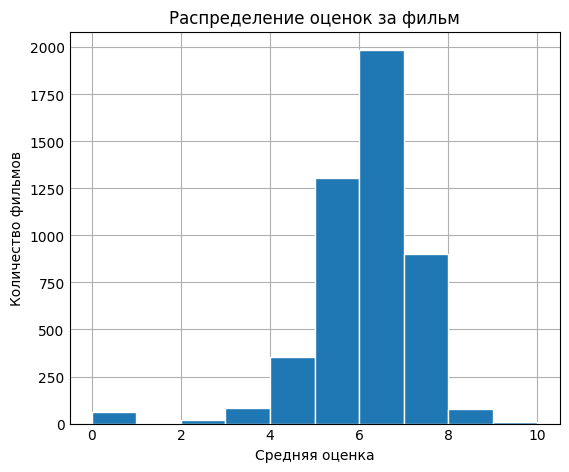

In [ ]:
plt.style.use('_mpl-gallery')

x = data["vote_average"]
plt.rcParams["figure.figsize"] = [5, 4]

fig, ax = plt.subplots()
plt.xlabel("Средняя оценка")
plt.ylabel("Количество фильмов")
plt.title("Распределение оценок за фильм")

ax.hist(x, bins=10, edgecolor="white")

plt.show()

Распределение языков, на которых сняты фильмы

<Axes: xlabel='original_language', ylabel='count'>

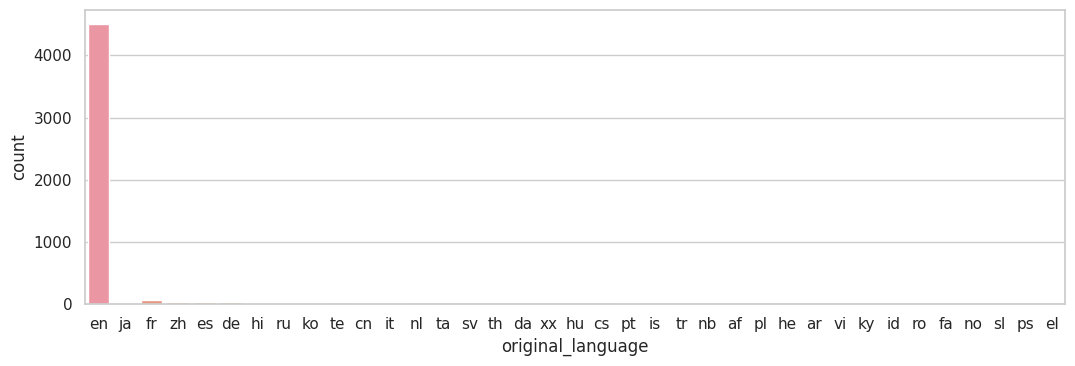

In [ ]:
plt.figure(figsize=(10, 3))
sns.set_style("whitegrid")
sns.countplot(x="original_language", data=data)

In [ ]:
Количество фильмов, снятых на английском языке

In [ ]:
eng_films_number = len(data[data["original_language"]=="en"])
eng_films_number

4505

In [ ]:
print(f'Количество фильмов на английском языке по отношению ко всему количеству фильмов: {round((eng_films_number / data.shape[0]) * 100, 2)}%.')

Количество фильмов на английском языке по отношению ко всему количеству фильмов: 93.8%.


Количество фильмов, снятых на французском языке

In [ ]:
print(f'Количество фильмов на французском языке по отношению ко всему количеству фильмов: {round((len(data[data["original_language"]=="fr"]) / data.shape[0]) * 100, 2)}%.')

Количество фильмов на французском языке по отношению ко всему количеству фильмов: 1.46%.


Годы выпуска фильмов

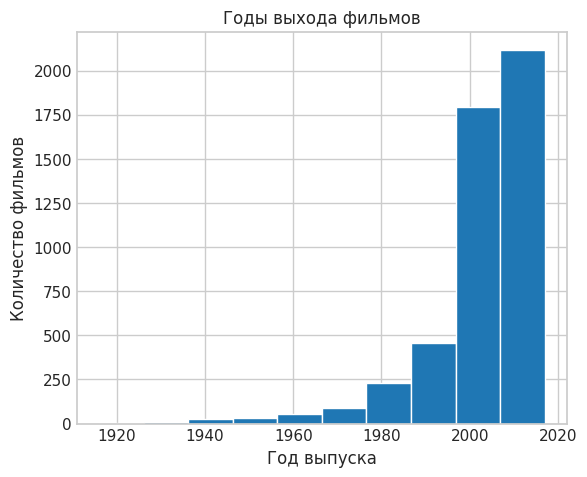

In [ ]:
plt.style.use('_mpl-gallery')

x = data["year"]
plt.rcParams["figure.figsize"] = [5, 4]

fig, ax = plt.subplots()
plt.xlabel("Год выпуска")
plt.ylabel("Количество фильмов")
plt.title("Годы выхода фильмов")

ax.hist(x, bins=10, edgecolor="white")

plt.show()

Самый дорогой фильм в производстве




In [ ]:
data.loc[data["budget"] == data["budget"].max()] # Pirates of the Caribbean: On Stranger Tides

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year
17,380000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",http://disney.go.com/pirates/index-on-stranger...,1865,"[{""id"": 658, ""name"": ""sea""}, {""id"": 1316, ""nam...",en,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,135.413856,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2011-05-14,1045713802,136.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Live Forever Or Die Trying.,Pirates of the Caribbean: On Stranger Tides,6.4,4948,2011.0


Самый длинный фильм

In [ ]:
data.loc[data["runtime"] == data["runtime"].max()] # Carlos

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year
2384,18000000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",NaN,43434,"[{""id"": 1419, ""name"": ""gun""}, {""id"": 7336, ""na...",en,Carlos,"The story of Venezuelan revolutionary, Ilich R...",1.138383,"[{""name"": ""Egoli Tossell Film AG"", ""id"": 2254}...",...,2010-05-19,871279,338.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,The man who hijacked the world,Carlos,6.7,50,2010.0


Самый кассовый фильм

In [ ]:
data.loc[data["revenue"] == data["revenue"].max()] # Avatar

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009.0


### Вывод

1.   Фильмы оценивались по шкале от 0 до 10, средняя оценка — 6.09 баллов. По графику распределения видно, что в основном действительно ставят от шести до семи баллов. Таких оценок — почти половина от общего количества.
2.   По графику распределения языков, на которых сняты фильмы, особенно выделяется английский язык: на нём сняты почти все фильмы — 94%. Далее идёт французский язык — 1,5%. Остальные языки представлены в очень малом количестве фильмов.
3.   В основном в выборку попали фильмы с 2000 по 2017 годы выпуска.
4.   Самый дорогой фильм — Pirates of the Caribbean: On Stranger Tides, самый длинный фильм — Carlos, самый кассовый — Avatar.

### 4. Общий вывод

Датасет представляет собой выборку из почти 4800 фильмов. Фильмы выходили с 1916 по 2017 год. Большая их часть снята, начиная с 2000 года.

1.  Средний бюджет фильма составляет 29 045 040 у. е. Самый дорогой фильм обошёлся в 380 000 000 у. е., это фильм Pirates of the Caribbean: On Stranger Tides, у самого дешёвого размер бюджета не указан (0 у. е.).
2.  Средняя продолжительность фильма составляет 106.875859 минут. Самый длинный фильм идёт 338 минут, это фильм Carlos, длительность самого короткого не указана (0 минут).
3.  Средняя выручка составила 82 260 640 у. е. Самый кассовый фильм с выручкой 2 787 965 087 у. е. — это Avatar. Выручка самого некассового фильма не указана (0 у. е.).
4.  Средняя оценка за фильм — 6.09 баллов из десяти. Минимальная оценка — 0 баллов.

В основном фильмы сняты на английском языке в США. Вторым со значительным отрывом идёт французский язык. А в целом фильмы из выборки представлены на 37 языках.


В выборке присутствуют фильмы двадцати разных жанров. В основном это драматические фильмы.


Фильмы сняты в 5017 разных выпускающих компаниях. Самая часто выпускающая фильмы компания — это Warner Bros.

